# **Problem Statement**

## Business Context

A sales forecast is a prediction of future sales revenue based on historical data, industry trends, and the status of the current sales pipeline. Businesses use the sales forecast to estimate weekly, monthly, quarterly, and annual sales totals. A company needs to make an accurate sales forecast as it adds value across an organization and helps the different verticals to chalk out their future course of action.

Forecasting helps an organization plan its sales operations by region and provides valuable insights to the supply chain team regarding the procurement of goods and materials. An accurate sales forecast process has many benefits which include improved decision-making about the future and reduction of sales pipeline and forecast risks. Moreover, it helps to reduce the time spent in planning territory coverage and establish benchmarks that can be used to assess trends in the future.

## Objective

SuperKart is a retail chain operating supermarkets and food marts across various tier cities, offering a wide range of products. To optimize its inventory management and make informed decisions around regional sales strategies, SuperKart wants to accurately forecast the sales revenue of its outlets for the upcoming quarter.

To operationalize these insights at scale, the company has partnered with a data science firm—not just to build a predictive model based on historical sales data, but to develop and deploy a robust forecasting solution that can be integrated into SuperKart’s decision-making systems and used across its network of stores.

## Data Description

The data contains the different attributes of the various products and stores.The detailed data dictionary is given below.

- **Product_Id** - unique identifier of each product, each identifier having two letters at the beginning followed by a number.
- **Product_Weight** - weight of each product
- **Product_Sugar_Content** - sugar content of each product like low sugar, regular and no sugar
- **Product_Allocated_Area** - ratio of the allocated display area of each product to the total display area of all the products in a store
- **Product_Type** - broad category for each product like meat, snack foods, hard drinks, dairy, canned, soft drinks, health and hygiene, baking goods, bread, breakfast, frozen foods, fruits and vegetables, household, seafood, starchy foods, others
- **Product_MRP** - maximum retail price of each product
- **Store_Id** - unique identifier of each store
- **Store_Establishment_Year** - year in which the store was established
- **Store_Size** - size of the store depending on sq. feet like high, medium and low
- **Store_Location_City_Type** - type of city in which the store is located like Tier 1, Tier 2 and Tier 3. Tier 1 consists of cities where the standard of living is comparatively higher than its Tier 2 and Tier 3 counterparts.
- **Store_Type** - type of store depending on the products that are being sold there like Departmental Store, Supermarket Type 1, Supermarket Type 2 and Food Mart
- **Product_Store_Sales_Total** - total revenue generated by the sale of that particular product in that particular store


# **Installing and Importing the necessary libraries**

In [1]:
#Installing the libraries with the specified versions
!pip install numpy==2.0.2 pandas==2.2.2 scikit-learn==1.6.1 matplotlib==3.10.0 seaborn==0.13.2 joblib==1.4.2 xgboost==2.1.4 requests==2.32.4 huggingface_hub==0.34.0 -q

**Note:**

- After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab) and run all cells sequentially from the next cell.

- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# For splitting the dataset
from sklearn.model_selection import train_test_split

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingRegressor,
    RandomForestRegressor,
    AdaBoostRegressor,
    GradientBoostingRegressor,
)
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

# Libraries to get different metric scores
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    mean_absolute_percentage_error
)

# To create the pipeline
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline,Pipeline

# To tune different models and standardize
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler,OneHotEncoder

# To serialize the model
import joblib

# os related functionalities
import os

# API request
import requests

# for hugging face space authentication to upload files
from huggingface_hub import login, HfApi

# **Loading the dataset**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
kart = pd.read_csv("/content/drive/MyDrive/Python Course/SuperKart.csv")

In [5]:
data = kart.copy()

# **Data Overview**

In [6]:
data.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16
3,FD8233,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18
4,NC1180,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36


In [7]:
data.tail()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
8758,NC7546,14.80,No Sugar,0.016,Health and Hygiene,140.53,OUT004,2009,Medium,Tier 2,Supermarket Type2,3806.53
8759,NC584,14.06,No Sugar,0.142,Household,144.51,OUT004,2009,Medium,Tier 2,Supermarket Type2,5020.74
8760,NC2471,13.48,No Sugar,0.017,Health and Hygiene,88.58,OUT001,1987,High,Tier 2,Supermarket Type1,2443.42
8761,NC7187,13.89,No Sugar,0.193,Household,168.44,OUT001,1987,High,Tier 2,Supermarket Type1,4171.82
8762,FD306,14.73,Low Sugar,0.177,Snack Foods,224.93,OUT002,1998,Small,Tier 3,Food Mart,2186.08


In [8]:
data.shape

(8763, 12)

There are 8763 recods in the dataset , 8763 are rows and 12 are columns

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Product_Id                 8763 non-null   object 
 1   Product_Weight             8763 non-null   float64
 2   Product_Sugar_Content      8763 non-null   object 
 3   Product_Allocated_Area     8763 non-null   float64
 4   Product_Type               8763 non-null   object 
 5   Product_MRP                8763 non-null   float64
 6   Store_Id                   8763 non-null   object 
 7   Store_Establishment_Year   8763 non-null   int64  
 8   Store_Size                 8763 non-null   object 
 9   Store_Location_City_Type   8763 non-null   object 
 10  Store_Type                 8763 non-null   object 
 11  Product_Store_Sales_Total  8763 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 821.7+ KB


The dataset contains a mix of numerical and categorical variables. Product_Weight, Product_Allocated_Area, Product_MRP, Store_Establishment_Year, and Product_Store_Sales_Total are **numerical**. while the remaining columns are categorical.

Some columns contain missing values this is indicating that **data preprocessing will be required before model training**

In [10]:
data.describe()

,Product_Weight,Product_Allocated_Area,Product_MRP,Store_Establishment_Year,Product_Store_Sales_Total
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,12.653792,0.068786,147.032539,2002.032751,3464.003640
std,2.217320,0.048204,30.694110,8.388381,1065.630494
min,4.000000,0.004000,31.000000,1987.000000,33.000000
25%,11.150000,0.031000,126.160000,1998.000000,2761.715000
50%,12.660000,0.056000,146.740000,2009.000000,3452.340000
75%,14.180000,0.096000,167.585000,2009.000000,4145.165000
max,22.000000,0.298000,266.000000,2009.000000,8000.000000


* On average/mean product generates 3,464 dollars in sales per store
* dataset has 8,763 product store sales on record.
* Sales vary significantly between products and stores at 1065
* lowest recorded sales value is 33
* 25% of products made less than 2,761 dollars
* 75% of products make less than 4,145 dollars
* Highest sales recorded 8,000
* 50% Middle sales value 3,452

**Mean**= 3464

**Median** = 3452

They are super close this suggests that sales distribution is fairly balanced
Not heavily skewed


The statistical summary shows that the numerical features have a wide range of values across the dataset. The target variable Product Store Sales Total (target column)  has an average value of approximately 3464 with values ranging from 33 to 8000. This is  indicating significant variability in sales performance.The similarity between the mean and median values across most variables suggests that the data is relatively evenly distributed with limited skewness

In [11]:
data.duplicated().sum()

np.int64(0)

duplicate value check returned 0, indicating that there are no duplicate records present in the dataset.

In [12]:
(data.isnull().sum() / len(data)) * 100

,0
Product_Id,0.0
Product_Weight,0.0
Product_Sugar_Content,0.0
Product_Allocated_Area,0.0
Product_Type,0.0
Product_MRP,0.0
Store_Id,0.0
Store_Establishment_Year,0.0
Store_Size,0.0
Store_Location_City_Type,0.0


The missing value analysis shows that all columns contain complete data with no missing observations. This indicates that the dataset is fully populated and does not require imputation or removal of records.

# **Exploratory Data Analysis (EDA)**

## Univariate Analysis

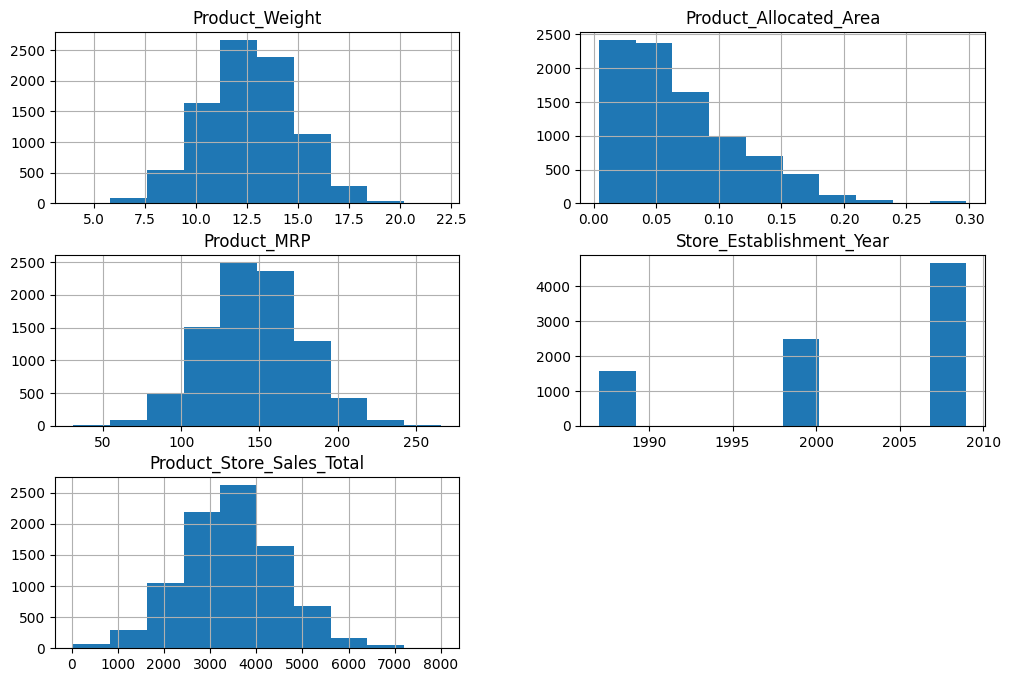

In [13]:
num_cols = [
    "Product_Weight",
    "Product_Allocated_Area",
    "Product_MRP",
    "Store_Establishment_Year",
    "Product_Store_Sales_Total"
]

data[num_cols].hist(figsize=(12,8))
plt.show()

Columns: Product_Weight, Product_MRP, and Product_Store_Sales_Total appear normally distributed. This is indicating a balanced value ranges.

Product_Allocated_Area shows slight right skewness.

Store_Establishment_Year indicates that most stores were established in more recent years.

In [14]:
cat_cols = [
    "Product_Sugar_Content",
    "Product_Type",
    "Store_Size",
    "Store_Location_City_Type",
    "Store_Type"
]

for col in cat_cols:
    print(data[col].value_counts())
    print("\n")

Product_Sugar_Content
Low Sugar    4885
Regular      2251
No Sugar     1519
reg           108
Name: count, dtype: int64


Product_Type
Fruits and Vegetables    1249
Snack Foods              1149
Frozen Foods              811
Dairy                     796
Household                 740
Baking Goods              716
Canned                    677
Health and Hygiene        628
Meat                      618
Soft Drinks               519
Breads                    200
Hard Drinks               186
Others                    151
Starchy Foods             141
Breakfast                 106
Seafood                    76
Name: count, dtype: int64


Store_Size
Medium    6025
High      1586
Small     1152
Name: count, dtype: int64


Store_Location_City_Type
Tier 2    6262
Tier 1    1349
Tier 3    1152
Name: count, dtype: int64


Store_Type
Supermarket Type2     4676
Supermarket Type1     1586
Departmental Store    1349
Food Mart             1152
Name: count, dtype: int64




The categorical distributions show that Low Sugar products dominate the dataset, and Fruits and Vegetables along with Snack Foods are the most frequently sold product types.


Most **stores** are medium sized and mostly located in Tier 2 cities with Supermarket Type 2 stores appearing most often.

This suggests potential class imbalance that may influence sales trends and model learning.

## Bivariate Analysis

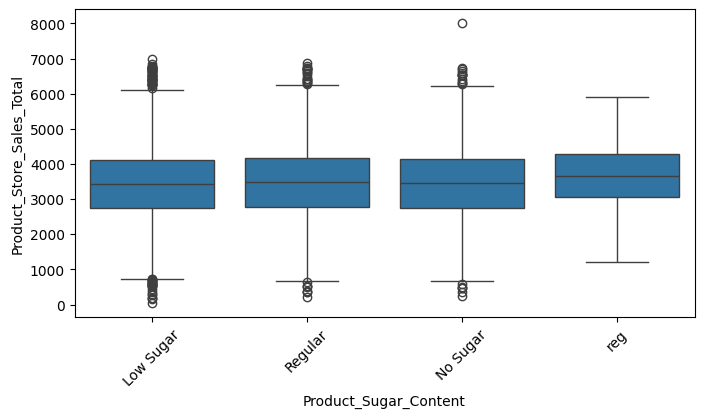

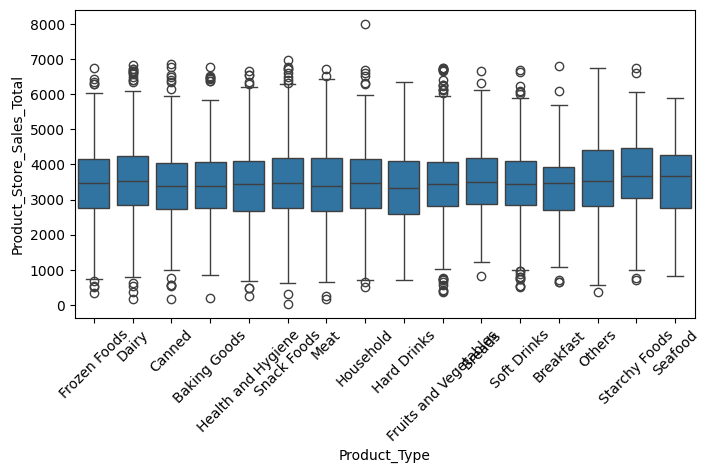

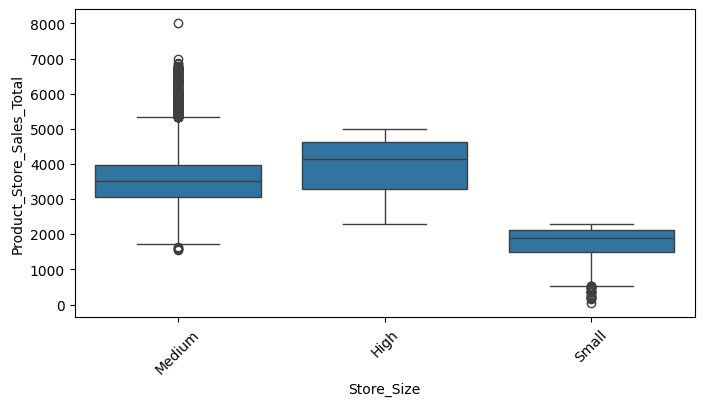

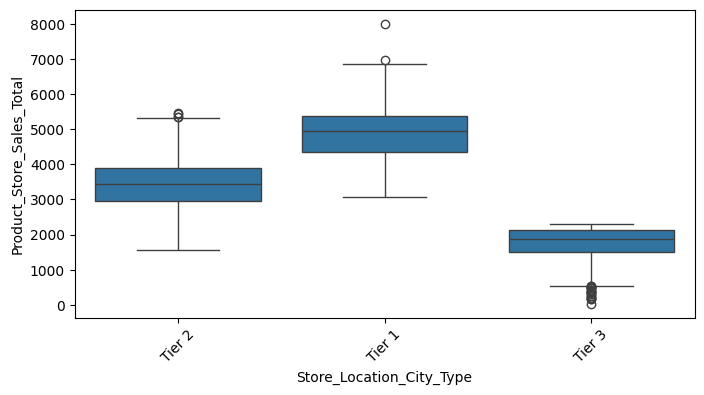

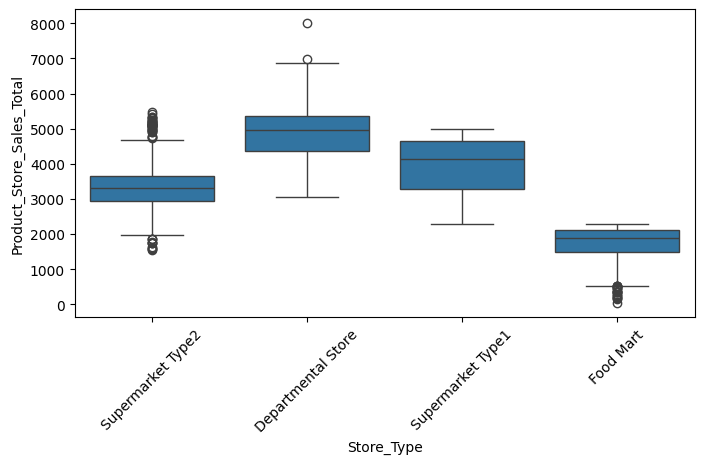

In [15]:
cat_cols = [
    "Product_Sugar_Content",
    "Product_Type",
    "Store_Size",
    "Store_Location_City_Type",
    "Store_Type"
]

for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=data[col], y=data["Product_Store_Sales_Total"])
    plt.xticks(rotation=45)
    plt.show()

                        Product Sugar Content vs Sales

Sales distribution appears relatively similar across Low Sugar, Regular, and No Sugar categories. There is only slight variation in median values. The category labeled reg appears to be a data inconsistency and may require cleaning
Sugar content does not appear to significantly impact total sales performance

                          Product Type vs Sales

Sales performance varies moderately across product types, though median values remain relatively close across most categories
Some categories such as Fruits and Vegetables and Household products show slightly higher sales ranges. Product type may contribute to sales variation but does not show extreme differences.

                            Store Size vs Sales

Store size shows a clear relationship with total sales
High sized stores generate the highest median sales and  Medium stores. Small stores show significantly lower sales.
This indicates that store size strongly influences revenue performance.

                    Store Location City Type vs Sales

Stores located in Tier 1 cities generate the highest median sales. The second highest was Tier 2 cities but Tier 3 cities show significantly lower sales. This suggests that city tier level has a strong impact on store revenue performance


                        Store Type vs Sales

Departmental Stores show the highest median sales, followed by Supermarket Type 1 and Type 2 stores, while Food Mart stores generate the lowest sales

This indicates that store format plays a significant role in overall revenue generation.

In [16]:
data["Store_Age"] = 2025 - data["Store_Establishment_Year"]

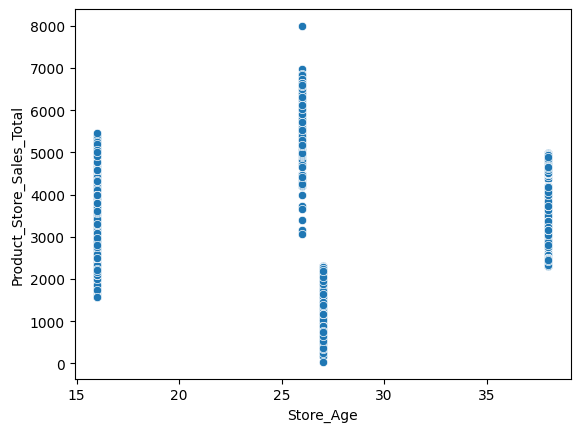

In [17]:
sns.scatterplot(x=data["Store_Age"], y=data["Product_Store_Sales_Total"])
plt.show()

The scatter plot shows that store age has a weak relationship with total sales Stores with similar ages display a wide range of sales values. This indicats that store age alone does not strongly influence revenue performance.
However, older stores still show slightly higher sales ranges compared to newer stores

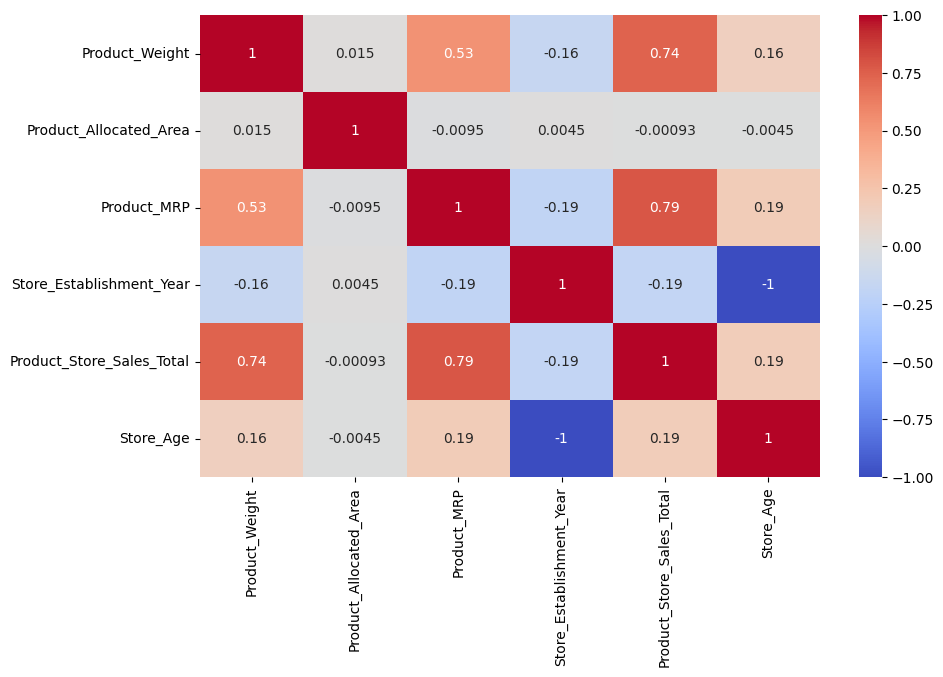

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()

The correlation heatmap shows that **Product_MRP** 0.79 and **Product_Weight** 0.74 have strong positive relationships with total sales.
This is indicating that higher priced and heavier products tend to generate higher revenue.

**Product_Allocated_Area**shows almost no correlation with sales -0.0009, suggesting limited impact on revenue performance

**Store_Age** shows a weak positive correlation with sales 0.19

 **Store_Establishment_Year** shows a negative correlation with sales -0.19 due to its inverse relationship with store age

Exploratory Data Analysis identified key columns influencing sales performance across stores.

Store characteristics, including store size, type, and location tier . This has demonstrated strong relationships with revenue generation.

Product characteristics like product price and product weight showed strong positive correlations with total sales This suggests they product weight and product price are significant predictors.

The sales has  normal distribution and this will be supporting regression based modeling approaches I am going to use. Finally  feature engineering introduced store age, which provided additional context for store maturity and store operations overall performance .

# **Data Preprocessing**

in my  boxplot, the sugar content column showed an extra category named reg Thats most likely just an inconsistent label for Regular. If we dont fix it the model will treat reg and Regular as two separate categories, which:

* creates duplicate/incorrect categories

* splits the data unnecessarily

* and makes one-hot encoding messy

In [19]:
#  normolize category labels in Product Sugar_Content column
data["Product_Sugar_Content"] = data["Product_Sugar_Content"].replace({"reg": "Regular"})

In [20]:
data["Product_Sugar_Content"].value_counts()

,count
Product_Sugar_Content,
Low Sugar,4885
Regular,2359
No Sugar,1519


The Product_Sugar_Content column contained inconsistent labeling, where **reg** represented the same category as **Regular** After normalizing the labels the dataset now contains three clean categories: Low Sugar, Regular, and No Sugar. This ensures accurate encoding and prevents duplicates categorical representations during my model training

In [21]:
data.drop(["Product_Id", "Store_Id"], axis=1, inplace=True)

In [22]:
data.head()

,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Store_Age
0,12.66,Low Sugar,0.027,Frozen Foods,117.08,2009,Medium,Tier 2,Supermarket Type2,2842.40,16
1,16.54,Low Sugar,0.144,Dairy,171.43,1999,Medium,Tier 1,Departmental Store,4830.02,26
2,14.28,Regular,0.031,Canned,162.08,1987,High,Tier 2,Supermarket Type1,4130.16,38
3,12.10,Low Sugar,0.112,Baking Goods,186.31,1987,High,Tier 2,Supermarket Type1,4132.18,38
4,9.57,No Sugar,0.010,Health and Hygiene,123.67,1998,Small,Tier 3,Food Mart,2279.36,27


I removed the Product_id and store_id because they really didnt have any meaningful patterns related to sales.

In [23]:
data.drop("Store_Establishment_Year", axis=1, inplace=True)

Store_Establishment_Year was removed because it was transformed into the **Store_Age** feaetur. This provides a more understandable representation of store maturity. Keeping both variables would had made my models more redundant and could affect model performance. The dataset now contains only relevant predictive feature

In [24]:
data.columns

Index(['Product_Weight', 'Product_Sugar_Content', 'Product_Allocated_Area',
       'Product_Type', 'Product_MRP', 'Store_Size', 'Store_Location_City_Type',
       'Store_Type', 'Product_Store_Sales_Total', 'Store_Age'],
      dtype='object')

In [25]:
X = data.drop("Product_Store_Sales_Total", axis=1)
y = data["Product_Store_Sales_Total"]

In [26]:
X.head()
y.head()

,Product_Store_Sales_Total
0,2842.40
1,4830.02
2,4130.16
3,4132.18
4,2279.36


The dataset was divided into column/features variables x and the target variable y. The target variable represents **total product sales**, which the model aims to predict. Separating columns from the target ensures proper model training and prevents data leakage

In [27]:
X = pd.get_dummies(X, drop_first=True)

In [28]:
X.head()
X.shape

(8763, 28)

my categorical variables were transformed into numerical format using one hot encoding. The number of feature columns increased from 9 to 28 due to the creation of dummy variables

Train/Test Split

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

80% training data

20% testing data

In [30]:
X_train.shape
X_test.shape

(1753, 28)

1,753 rows in testing set
28 feature columns

# **Model Building**

## Define functions for Model Evaluation

In [31]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mean_absolute_percentage_error(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

The ML models to be built can be any two out of the following:
1. Decision Tree
2. Bagging
3. Random Forest
4. AdaBoost
5. Gradient Boosting
6. XGBoost

In [32]:
                ##Decsion Tree Model Building

###Decision Tree regression model
from sklearn.tree import DecisionTreeRegressor

# First we train decision tree regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [33]:
# Next Performance on Train data
dt_train_perf = model_performance_regression(dt_model, X_train, y_train)
dt_train_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.0,0.0,1.0,1.0,0.0


In [34]:
#  Performance on Test data
dt_test_perf = model_performance_regression(dt_model, X_test, y_test)
dt_test_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,401.460882,140.961569,0.858748,0.856454,0.048181


In this step I trained a Decision Tree Regressor using the training dataset. Decision Trees can capture nonlinear relationships in the data and work well without requiring feature scaling. I evaluated the model on both training and testing data using RMSE, MAE, R-squared, Adjusted R-squared, and MAPE to understand how well the model fits and whether it generalizes to unseen data

The Decision Tree model achieved perfect **training** performance with RMSE and MAE values of 0 and an R-squared of 1.0. This is indicating complete learning of the training data.

On the **test dataset** the model achieved an RMSE of 401.46, MAE of 140.96, and an Rsquared value of 0.858. This is showing good but reduced performance on unseen data. The noticeable difference between training and testing metrics indicates that the model is overfitting and may benefit from pruning or regularization technique

In [35]:
            ##XGboost Model Building

from xgboost import XGBRegressor

xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [36]:
#evaluate training performance
xgb_train_perf = model_performance_regression(xgb_model, X_train, y_train)
xgb_train_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,135.882055,64.333058,0.983718,0.983653,0.02276


In [37]:
#evaluate testing performance
xgb_test_perf = model_performance_regression(xgb_model, X_test, y_test)
xgb_test_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,303.72508,136.586959,0.919152,0.917839,0.050736


The XGBoost model achieved strong performance on the training dataset with an RMSE of 135.88 , MAE of 64.33, and an R squared value of 0.9837. This is indicating excellent model fit.

On the test dataset, the model achieved an RMSE of 303.73, MAE of 136.59, and an R squared value of 0.9192. This is showing strong predictive accuracy on unseen data.



In [42]:
#get and add names
dt_test_perf["Model"] = "Decision Tree"
xgb_test_perf["Model"] = "XGBoost"

# Combine both results
model_comparison = pd.concat([dt_test_perf, xgb_test_perf], ignore_index=True)

# Reorder columns for readability
model_comparison = model_comparison[
    ["Model", "RMSE", "MAE", "R-squared", "Adj. R-squared", "MAPE"]
]

model_comparison

print(model_comparison.to_string(index=False))

        Model       RMSE        MAE  R-squared  Adj. R-squared     MAPE
Decision Tree 401.460882 140.961569   0.858748        0.856454 0.048181
      XGBoost 303.725080 136.586959   0.919152        0.917839 0.050736


Compared to the Decision Tree model, XGBoost reduced testing error and improved generalization, indicating better overall model performanc

# **Model Performance Improvement - Hyperparameter Tuning**

Decsion Tree

In [43]:
from sklearn.model_selection import GridSearchCV
# I use GridSearchCV to automatically test many parameter combinations

from sklearn.tree import DecisionTreeRegressor
# This is the base Decision Tree regression model I want to tune

from sklearn.metrics import make_scorer, r2_score
# I am using R-squared as the performance metric during tuning

import numpy as np


# Create base Decision Tree model
dtree = DecisionTreeRegressor(random_state=42)
# random_state keeps results consistent every time I run the code


# Define parameter grid to control tree complexity
dt_params = {

    "max_depth": list(np.arange(2, 11)),
    # Controls how deep I allow the tree to grow
    # Smaller depth keeps tree simple

    "min_samples_leaf": [1, 3, 5, 10],
    # 1A leaf can contain just 1 training example
    # The tree can memorize individual data points (high overfitting risk)
    # 3:Each leaf must contain at least 3 training examples
    # 5:Each leaf must contain at least 5 training examples
    # 10:Each leaf must contain at least 10 training examples
    # Tree becomes more stable but may start underfitting if too large

    "max_leaf_nodes": [None, 10, 20, 30, 50],
    # Limits total number of leaf nodes
    # Helps control overall tree complexity
    # None No limit on number of leaves (tree can grow freely)
    # 10 Maximum of 10 leaf nodes allowed
    # 20 Maximum of 20 leaf nodes allowed
    # 30 Maximum of 30 leaf nodes allowed
    # 50 Maximum of 50 leaf nodes allowed
    # Limits overall tree size and complexity

    "min_impurity_decrease": [0.0, 0.001, 0.01, 0.1],
    # Controls how much improvement is required before making a split
    # Higher values prevent unnecessary splitting
    # 0.0  Allows every possible split (very flexible tree)
    # 0.001 Requires small improvement before splitting
    # 0.01 Requires moderate improvement
    # 0.1 Only allows splits that significantly improve the model
    # Higher value = fewer splits = simpler tree
}


# Create GridSearch object
dt_grid = GridSearchCV(

    estimator=dtree,
    # The model I want to tune

    param_grid=dt_params,
    # The parameter combinations GridSearch will test

    scoring=make_scorer(r2_score),
    # Using R squared to evaluate which model performs best

    cv=3,
    # Using 3 fold cross validation
    # Training data is split into 3 parts and model is tested multiple times

    n_jobs=-1
    # Uses all CPU cores to speed up computation
)


# Run hyperparameter tuning
dt_grid.fit(X_train, y_train)
# GridSearch tries every parameter combination and finds the best performing model


# Extract best model found during tuning
best_dt = dt_grid.best_estimator_
# This stores the Decision Tree with the best parameter settings


best_dt
# Displays best tuned model

DecisionTreeRegressor(max_depth=np.int64(9), min_samples_leaf=10,
                      random_state=42)

In [44]:
dt_tuned_train_perf = model_performance_regression(best_dt, X_train, y_train)
dt_tuned_test_perf  = model_performance_regression(best_dt, X_test, y_test)

dt_tuned_train_perf, dt_tuned_test_perf

(         RMSE         MAE  R-squared  Adj. R-squared      MAPE
 0  277.729437  130.027508   0.931983        0.931711  0.048468,
          RMSE        MAE  R-squared  Adj. R-squared      MAPE
 0  307.352416  145.06673    0.91721        0.915865  0.051912)

The **tuned Decision Tree model** achieved improved generalization compared to the **original Decision Tree model**. On the training dataset, the model achieved an RMSE of 277.73, MAE of 130.03, and an R squared value of 0.9320

 This is indicating strong model fit while reducing overfitting. On the test dataset the model achieved an RMSE of 307.35, MAE of 145.07, and an R squared value of 0.9172. This is  showing improved predictive performance and better balance between **training and testing accuracy**

XGBOOST

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score
from xgboost import XGBRegressor
import numpy as np

#base XGBoost model I want to tune
xgb = XGBRegressor(
    random_state=42,
    objective="reg:squarederror"
)

#parameter grid to test different boosting settings
xgb_params = {

    "n_estimators": [200, 400, 600],
    #how many trees I build
    #moore trees can improve learning but can overfit if too many

    "learning_rate": [0.05, 0.1],
    #how big each step is while learning
    #smaller rate learns slower but can generalize better

    "subsample": [0.8, 1.0],
    #percent of training rows used per tree
    #lower values add randomness to reduce overfitting

    "gamma": [0, 0.1, 0.2],
    #minimum loss reduction needed to make a split
    #higher values make the model more conservative

    "colsample_bytree": [0.8, 1.0],
    #percent of features used per tree
    #lower values reduce overfitting

    "colsample_bylevel": [0.8, 1.0],
    #percent of features used at each split level
    #adds more randomness to improve generalization
}

#GridSearch tries all parameter combinations using cross validation
xgb_grid = GridSearchCV(
    estimator=xgb,
    param_grid=xgb_params,
    scoring=make_scorer(r2_score),
    cv=3,
    n_jobs=-1
)

#run tuning on training data
xgb_grid.fit(X_train, y_train)

#best tuned XGBoost model
best_xgb = xgb_grid.best_estimator_
best_xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=0.8, colsample_bynode=None, colsample_bytree=1.0,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.1, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, random_state=42, ...)

I tuned the XGBoost model using GridSearchCV to test multiple parameter combinations. The goal is to improve prediction accuracy and reduce overfitting by adjusting boosting strength, number of trees, and random sampling of rows and features. The best performing model is selected based on cross validated R squared and evaluated on both training and testing dataset

In [46]:
xgb_tuned_train_perf = model_performance_regression(best_xgb, X_train, y_train)
xgb_tuned_test_perf  = model_performance_regression(best_xgb, X_test, y_test)

xgb_tuned_train_perf, xgb_tuned_test_perf

(         RMSE        MAE  R-squared  Adj. R-squared      MAPE
 0  210.693964  83.939294   0.960855        0.960698  0.031276,
          RMSE         MAE  R-squared  Adj. R-squared      MAPE
 0  286.077214  117.417279   0.928275         0.92711  0.043455)

The tuned XGBoost model has a strong predictive performance on **both training and testing datasets**. On the training dataset the model achieved an RMSE of 210.69, MAE of 83.94 and an R squared value of 0.9609. This is indicating strong learning capability without memorizing the my data.

On the **testing dataset** the model achieved an RMSE of 286.08, MAE of 117.42, and an R squared value of 0.9283. This means there is an improved predictive accuracy and better generalization compared to **previous model**

# **Model Performance Comparison, Final Model Selection, and Serialization**

In [47]:
# adding my model names to each test performance dataframe
dt_test_perf["Model"] = "Decision Tree (Default)"
dt_tuned_test_perf["Model"] = "Decision Tree (Tuned)"
xgb_test_perf["Model"] = "XGBoost (Default)"
xgb_tuned_test_perf["Model"] = "XGBoost (Tuned)"

# combine into one comparison table
final_comparison = pd.concat(
    [dt_test_perf, dt_tuned_test_perf, xgb_test_perf, xgb_tuned_test_perf],
    ignore_index=True
)

# reorder all the important columns
final_comparison = final_comparison[
    ["Model", "RMSE", "MAE", "R-squared", "Adj. R-squared", "MAPE"]
]

final_comparison.sort_values(by="RMSE")

,Model,RMSE,MAE,R-squared,Adj. R-squared,MAPE
3,XGBoost (Tuned),286.077214,117.417279,0.928275,0.927110,0.043455
2,XGBoost (Default),303.725080,136.586959,0.919152,0.917839,0.050736
1,Decision Tree (Tuned),307.352416,145.066730,0.917210,0.915865,0.051912
0,Decision Tree (Default),401.460882,140.961569,0.858748,0.856454,0.048181


The model comparison shows that the tuned XGBoost model achieved the best performance among all evaluated models. The tuned XGBoost model produced the lowest RMSE of 286.08 and the highest R-squared value of 0.9283, indicating superior predictive accuracy and strong explanatory power.

The tuned Decision Tree and default XGBoost models also performed well but showed slightly higher prediction errors.


The default Decision Tree model showed the weakest performance, with the highest RMSE and lowest R squared value, indicating overfitting and bed generalization

Based on performance evaluation across all models I decided that the tuned **XGBoost  model was selectedas the final model** because it achieved the lowest prediction error and highest variance explanation on the test dataset.

The tuned XGBoost model also demonstrated better stability and generalization compared to other models

In [49]:
dt_train_perf["Model"] = "Decision Tree (Default)"
dt_tuned_train_perf["Model"] = "Decision Tree (Tuned)"
xgb_train_perf["Model"] = "XGBoost (Default)"
xgb_tuned_train_perf["Model"] = "XGBoost (Tuned)"

train_comparison = pd.concat(
    [dt_train_perf, dt_tuned_train_perf, xgb_train_perf, xgb_tuned_train_perf],
    ignore_index=True
)[["Model", "RMSE", "MAE", "R-squared", "Adj. R-squared", "MAPE"]].sort_values("RMSE")

train_comparison

,Model,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,Decision Tree (Default),0.000000,0.000000,1.000000,1.000000,0.000000
2,XGBoost (Default),135.882055,64.333058,0.983718,0.983653,0.022760
3,XGBoost (Tuned),210.693964,83.939294,0.960855,0.960698,0.031276
1,Decision Tree (Tuned),277.729437,130.027508,0.931983,0.931711,0.048468


                                  Serilization!

In [48]:
import joblib

# saving trained model
joblib.dump(best_xgb, "superkart_xgb_model.pkl")

#saving feature column names
joblib.dump(X_train.columns, "superkart_features.pkl")

['superkart_features.pkl']

In [50]:
import os, joblib
os.makedirs("backend_files", exist_ok=True)
joblib.dump(best_xgb, "backend_files/superkart_xgb_model.joblib")
joblib.dump(X_train.columns, "backend_files/superkart_features.joblib")

['backend_files/superkart_features.joblib']

In [52]:
import joblib

#load the saved model
saved_model = joblib.load("backend_files/superkart_xgb_model.joblib")

# Load feature columns
saved_features = joblib.load("backend_files/superkart_features.joblib")

print("Model loaded successfully.")

Model loaded successfully.


In [53]:
model_performance_regression(saved_model, X_test, y_test)

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,286.077214,117.417279,0.928275,0.92711,0.043455


The serialized XGBoost model was successfully reloaded and evaluated on the test dataset.

The performance metrics matched the original evaluation results This is confirming that the model was saved and restored correctly. This validates that the model is deployment-ready and capable of producing consistent predictions in a production environment

# **Deployment - Backend**

## Flask Web Framework


In [56]:
import pandas as pd
import joblib
from flask import Flask, request, jsonify

#cCreate Flask app
superkart_api = Flask("superkart_api")

#load serialized model + feature columns (created during training)
MODEL_PATH = "backend_files/superkart_xgb_model.joblib"
FEATURES_PATH = "backend_files/superkart_features.joblib"

model = joblib.load(MODEL_PATH)
saved_features = joblib.load(FEATURES_PATH)  #pandas Index of columns used in training

#home route health check
@superkart_api.get("/")
def home():
    return "Welcome to the SuperKart Sales Forecast API. Use POST /v1/predict to get a sales prediction."

#helper: build the model-ready feature row from raw JSON
def build_features(payload: dict) -> pd.DataFrame:
    """
    [L26] Takes raw JSON inputs and returns a 1-row DataFrame aligned to training features.
    [L27] This reproduces your full-code preprocessing: pd.get_dummies + column alignment.
    """
    #required raw inputs (must match your original column names BEFORE get_dummies)
    required = [
        "Product_Weight",
        "Product_Sugar_Content",
        "Product_Allocated_Area",
        "Product_Type",
        "Product_MRP",
        "Store_Size",
        "Store_Location_City_Type",
        "Store_Type",
        "Store_Age",
    ]

    #validate required keys
    missing = [k for k in required if k not in payload]
    if missing:
        raise ValueError(f"Missing required fields: {missing}")

    #build raw dataframe (one row)
    raw_row = {
        "Product_Weight": float(payload["Product_Weight"]),
        "Product_Sugar_Content": str(payload["Product_Sugar_Content"]),
        "Product_Allocated_Area": float(payload["Product_Allocated_Area"]),
        "Product_Type": str(payload["Product_Type"]),
        "Product_MRP": float(payload["Product_MRP"]),
        "Store_Size": str(payload["Store_Size"]),
        "Store_Location_City_Type": str(payload["Store_Location_City_Type"]),
        "Store_Type": str(payload["Store_Type"]),
        "Store_Age": float(payload["Store_Age"]),
    }
    df_raw = pd.DataFrame([raw_row])

    #apply the same encoding approach you used in training
    df_encoded = pd.get_dummies(df_raw, drop_first=True)

    # Align to training columns:
    # add missing columns as 0
    # drop extra columns not seen in training
    df_aligned = df_encoded.reindex(columns=saved_features, fill_value=0)

    return df_aligned

#prediction endpoint
@superkart_api.post("/v1/predict")
def predict_sales():
    try:
        payload = request.get_json(force=True)

        X_infer = build_features(payload)
        pred = float(model.predict(X_infer)[0])

        return jsonify({"Sales": pred})

    except ValueError as ve:
        return jsonify({"error": str(ve)}), 400
    except Exception as e:
        return jsonify({"error": "Prediction failed", "details": str(e)}), 500

#run the Flask app
from threading import Thread

def run_app():
    superkart_api.run(host="0.0.0.0", port=7860, debug=False)

thread = Thread(target=run_app)
thread.start()

 * Serving Flask app 'superkart_api'
 * Debug mode: off


In [57]:
import requests

url = "http://127.0.0.1:7860/v1/predict"

payload = {
    "Product_Weight": 12.5,
    "Product_Sugar_Content": "Regular",
    "Product_Allocated_Area": 0.05,
    "Product_Type": "Snack Foods",
    "Product_MRP": 150,
    "Store_Size": "Medium",
    "Store_Location_City_Type": "Tier 2",
    "Store_Type": "Supermarket Type2",
    "Store_Age": 16
}

r = requests.post(url, json=payload, timeout=10)
print("Status:", r.status_code)
print("Response:", r.text)

INFO:werkzeug:127.0.0.1 - - [14/Feb/2026 00:01:08] "POST /v1/predict HTTP/1.1" 200 -


Status: 200
Response: {"Sales":4987.53076171875}



## Dependencies File

In [58]:
%%writefile backend_files/requirements.txt
flask==2.2.2
Werkzeug==2.2.2
pandas==2.2.2
numpy==2.0.2
scikit-learn==1.6.1
xgboost==2.1.4
joblib==1.4.2
requests==2.32.3
gunicorn==20.1.0
matplotlib==3.10.0
seaborn==0.13.2

Writing backend_files/requirements.txt


## Dockerfile

In [76]:
#backend_files Dockerfile
#lightweight Python base image
%%writefile backend_files/Dockerfile
FROM python:3.11-slim

# Set working directory
WORKDIR /app

# Copy requirements first (better Docker caching)
COPY requirements.txt /app/requirements.txt

# Install dependencies
RUN pip install --no-cache-dir -r /app/requirements.txt

# Copy all project files into container
COPY . /app

# Hugging Face Docker Spaces use port 7860
EXPOSE 7860

# Start Flask app with Gunicorn (production server)
CMD ["gunicorn", "-b", "0.0.0.0:7860", "app:superkart_api"]

Overwriting backend_files/Dockerfile


## Setting up a Hugging Face Docker Space for the Backend

In [61]:
from huggingface_hub import login, HfApi

#login
login(token=" my  token was here ")

#define repo
repo_id = "sanjuanitav2/superkart-backend-api"

#upload entire backend folder
api = HfApi()

api.upload_folder(
    folder_path="backend_files",
    repo_id=repo_id,
    repo_type="space"
)

print("Upload complete")

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

  ...end_files/superkart_features.joblib: 100%|##########| 1.33kB / 1.33kB            

  ...nd_files/superkart_xgb_model.joblib: 100%|##########|  823kB /  823kB            

Upload complete.


In [62]:
import os
os.listdir("backend_files")

['superkart_xgb_model.joblib',
 'requirements.txt',
 'superkart_features.joblib',
 'Dockerfile']

In [68]:
%%writefile backend_files/requirements.txt
flask==2.2.2
Werkzeug==2.2.2
pandas==2.2.2
numpy==2.0.2
scikit-learn==1.6.1
xgboost==2.1.4
joblib==1.4.2
requests==2.32.3
gunicorn==20.1.0

Overwriting backend_files/requirements.txt


In [69]:
import os

if os.path.exists("backend_files/requirments.txt"):
    os.remove("backend_files/requirments.txt")
print(os.listdir("backend_files"))

['superkart_xgb_model.joblib', 'requirements.txt', 'superkart_features.joblib', 'Dockerfile']


In [70]:
import os
print("app.py exists?", os.path.exists("backend_files/app.py"))

app.py exists? False


In [77]:
%%writefile backend_files/app.py
import pandas as pd
import joblib
from flask import Flask, request, jsonify

#create Flask app
superkart_api = Flask("superkart_api")

#load model and features
model = joblib.load("superkart_xgb_model.joblib")
saved_features = joblib.load("superkart_features.joblib")

@superkart_api.get("/")
def home():
    return "SuperKart Sales Forecast API is running."

def build_features(payload):
    raw_row = {
        "Product_Weight": float(payload["Product_Weight"]),
        "Product_Sugar_Content": str(payload["Product_Sugar_Content"]),
        "Product_Allocated_Area": float(payload["Product_Allocated_Area"]),
        "Product_Type": str(payload["Product_Type"]),
        "Product_MRP": float(payload["Product_MRP"]),
        "Store_Size": str(payload["Store_Size"]),
        "Store_Location_City_Type": str(payload["Store_Location_City_Type"]),
        "Store_Type": str(payload["Store_Type"]),
        "Store_Age": float(payload["Store_Age"]),
    }

    df_raw = pd.DataFrame([raw_row])
    df_encoded = pd.get_dummies(df_raw, drop_first=True)
    df_aligned = df_encoded.reindex(columns=saved_features, fill_value=0)

    return df_aligned

@superkart_api.post("/v1/predict")
def predict_sales():
    try:
        payload = request.get_json(force=True)
        X_infer = build_features(payload)
        prediction = float(model.predict(X_infer)[0])
        return jsonify({"Sales": prediction})
    except Exception as e:
        return jsonify({"error": str(e)}), 400

if __name__ == "__main__":
    superkart_api.run(host="0.0.0.0", port=7860)

Overwriting backend_files/app.py


In [73]:
import os
print("files inside backend_files")
print(os.listdir("backend_files"))

files inside backend_files
['app.py', 'superkart_xgb_model.joblib', 'requirements.txt', 'superkart_features.joblib', 'Dockerfile']


In [74]:
import os
print("app.py exists?", os.path.exists("backend_files/app.py"))

app.py exists? True


I need to reload everything into hugging face after my error

in short my requierments.txt was missspelled

I had to go back to hugginface and commit changes then come back and rebuild everything on my docker file

In [78]:
from huggingface_hub import HfApi

repo_id = "sanjuanitav2/superkart-backend-api"
api = HfApi()

api.upload_folder(
    folder_path="backend_files",
    repo_id=repo_id,
    repo_type="space"
)

print("my upload complete")

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

  ...end_files/superkart_features.joblib: 100%|##########| 1.33kB / 1.33kB            

  ...nd_files/superkart_xgb_model.joblib: 100%|##########|  823kB /  823kB            

my upload complete


Testing my back end request .

In [79]:
import requests

url = "https://sanjuanitav2-superkart-backend-api.hf.space/v1/predict"

payload = {
    "Product_Weight": 12.5,
    "Product_Sugar_Content": "Regular",
    "Product_Allocated_Area": 0.05,
    "Product_Type": "Snack Foods",
    "Product_MRP": 150,
    "Store_Size": "Medium",
    "Store_Location_City_Type": "Tier 2",
    "Store_Type": "Supermarket Type2",
    "Store_Age": 16
}

r = requests.post(url, json=payload)

print("Status:", r.status_code)
print("Response:", r.json())

Status: 200
Response: {'Sales': 4987.53076171875}


## Uploading Files to Hugging Face Space (Docker Space)

# **Deployment - Frontend**

## Points to note before executing the below cells
- Create a Streamlit space on Hugging Face by following the instructions provided on the content page titled **`Creating Spaces and Adding Secrets in Hugging Face`** from Week 1

## Streamlit for Interactive UI

In [80]:
#Create a folder for storing the files needed for frontend UI deployment
os.makedirs("frontend_files", exist_ok=True)

In [88]:
%%writefile frontend_files/app.py
import streamlit as st
import requests

st.set_page_config(page_title="SuperKart Sales Forecast", layout="centered")

st.title("SuperKart Sales Forecast UI")
st.write("Fill in product + store details, then click **Predict Sales**.")

#Inputs
Product_Weight = st.number_input("Product Weight", min_value=0.0, value=12.66, step=0.1)

Product_Sugar_Content = st.selectbox(
    "Product Sugar Content",
    ["Low Sugar", "Regular", "No Sugar"]
)

Product_Allocated_Area = st.number_input("Product Allocated Area", min_value=0.0, value=0.05, step=0.001)

Product_Type = st.selectbox(
    "Product Type",
    [
        "Fruits and Vegetables", "Snack Foods", "Frozen Foods", "Dairy", "Household",
        "Baking Goods", "Canned", "Health and Hygiene", "Meat", "Soft Drinks",
        "Breads", "Hard Drinks", "Others", "Starchy Foods", "Breakfast", "Seafood"
    ]
)

Product_MRP = st.number_input("Product MRP", min_value=0.0, value=150.0, step=1.0)

Store_Size = st.selectbox("Store Size", ["Small", "Medium", "High"])

Store_Location_City_Type = st.selectbox("Store Location City Type", ["Tier 1", "Tier 2", "Tier 3"])

Store_Type = st.selectbox(
    "Store Type",
    ["Supermarket Type1", "Supermarket Type2", "Departmental Store", "Food Mart"]
)

Store_Age = st.number_input("Store Age (years)", min_value=0.0, value=16.0, step=1.0)

#payload to backend
product_data = {
    "Product_Weight": Product_Weight,
    "Product_Sugar_Content": Product_Sugar_Content,
    "Product_Allocated_Area": Product_Allocated_Area,
    "Product_Type": Product_Type,
    "Product_MRP": Product_MRP,
    "Store_Size": Store_Size,
    "Store_Location_City_Type": Store_Location_City_Type,
    "Store_Type": Store_Type,
    "Store_Age": Store_Age
}

API_URL = "https://sanjuanitav2-superkart-backend-api.hf.space/v1/predict"

if st.button("Predict Sales", type="primary"):
    try:
        r = requests.post(
            API_URL,
            json=product_data,
            headers={"Content-Type": "application/json"},
            timeout=20
        )

        if r.status_code == 200:
            result = r.json()
            predicted_sales = result["Sales"]
            st.success(f"Predicted Product Store Sales Total: ₹{predicted_sales:.2f}")
        else:
            st.error(f"API Error {r.status_code}: {r.text}")

    except Exception as e:
        st.error(f"Request failed: {e}")

Writing frontend_files/app.py


## Dependencies File

In [82]:
%%writefile frontend_files/requirements.txt
streamlit==1.45.0
requests==2.32.3

Writing frontend_files/requirements.txt


In [83]:
from huggingface_hub import login, HfApi


login(token="")

# 2) Upload folder to your Streamlit Space
repo_id = "sanjuanitav2/superkart-frontend-ui"
api = HfApi()

api.upload_folder(
    folder_path="frontend_files",
    repo_id=repo_id,
    repo_type="space"
)

print("Frontend upload complete.")

Frontend upload complete.


In [84]:
import os

os.rename("frontend_files/app.py", "frontend_files/streamlit_app.py")

In [89]:
from huggingface_hub import HfApi

repo_id = "sanjuanitav2/superkart-frontend-ui"
api = HfApi()

api.upload_folder(
    folder_path="frontend_files",
    repo_id=repo_id,
    repo_type="space"
)

print("Frontend re-uploaded with correct filename")

Frontend re-uploaded with correct filename.


## DockerFile

In [86]:
%%writefile frontend_files/Dockerfile
# Use minimal Python image
FROM python:3.9-slim

WORKDIR /app

COPY . .

RUN pip3 install -r requirements.txt

CMD ["streamlit", "run", "streamlit_app.py", "--server.port=8501", "--server.address=0.0.0.0", "--server.enableXsrfProtection=false"]

Writing frontend_files/Dockerfile


## Uploading Files to Hugging Face Space (Streamlit Space)

In [87]:
from huggingface_hub import HfApi

repo_id = "sanjuanitav2/superkart-frontend-ui"
api = HfApi()

api.upload_folder(
    folder_path="frontend_files",
    repo_id=repo_id,
    repo_type="space"
)

print("Frontend reuploaded with corrected Dockerfile")

Frontend reuploaded with corrected Dockerfile


The trained SuperKart Sales Forecast model have been deployed using Hugging Face Space

Backend API Flask + Docker:

https://huggingface.co/spaces/sanjuanitav2/superkart-backend-api

Frontend UI Streamlit:

https://huggingface.co/spaces/sanjuanitav2/superkart-frontend-ui

# **Actionable Insights and Business Recommendations**

- The tuned XGBoost model performed best overall with the lowest RMSE and strongest generalization on test data.

- Product pricing MRP and store attributes store size, location tier, store type appear to be strong drivers of predicted sales.

- Higher predicted sales can guide inventory planning by increasing stock allocation for the best performing product store combinations.

- Lower predicted sales can highlight where promotions, pricing adjustments, or shelf space changes may be needed

- Store tier and store type differences suggest the business should tailor strategy by location instead of using one approach everywhere

- The deployed API + UI can be used by teams to quickly estimate sales for different product and store setups before making decisions



The tuned XGBoost model was selected as the final model because it achieved the lowest RMSE and strongest overall performance on the test dataset. It demonstrated better generalization compared to the Decision Tree models and reduced prediction error significantly. The model captures the impact of pricing, product type, and store characteristics on sales effectively. With successful deployment through a Flask API and Streamlit UI, the solution is now ready for practical business use